In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import geometry as geo
from scipy.spatial import Voronoi, voronoi_plot_2d

In [3]:
# snowflake geometry setup
symmetry = 6
angle = np.deg2rad(360/symmetry)  # snowflake angle, fixed
string_displacement = np.array([25, 50])  # position of central string
rotation_angle = np.deg2rad(30)  # rotation angle of full snowflake

# set up the baseline snowflake geometry
outer_scale = 100  # distance from center to outer strings
# distance from center to inner strings, fixed based on outer-string distance:
inner_scale = outer_scale / np.sqrt(3)

# center
baseline_string_positions = np.zeros((1,2))
# hexagon
hexagon = geo.create_symmetry(symmetry)
baseline_string_positions = np.concatenate(
    [baseline_string_positions, outer_scale * hexagon]
)

# twisted inner triangle
t_symmetry = 3
inner_triangle_string_positions = inner_scale * geo.create_symmetry(t_symmetry, angle/2)
baseline_string_positions = np.concatenate(
    [baseline_string_positions, inner_triangle_string_positions]
)

# apply overall transformation
string_positions = geo.apply_transformations(
    baseline_string_positions, string_displacement, rotation_angle
)


(-170.0, 170.0)

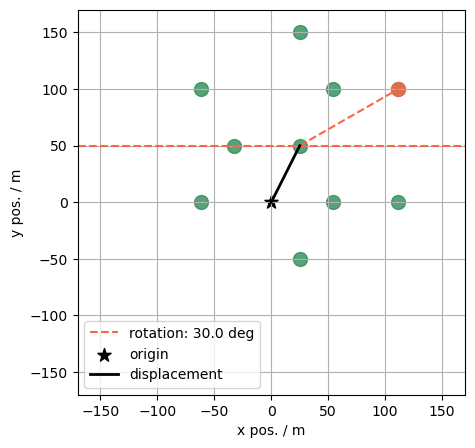

In [4]:

# visualization
size = 100
color = "seagreen"
ref_color = "tomato"
plt.figure(figsize=(5, 5))
plt.scatter(string_positions[:, 0], string_positions[:, 1], s=size, c=color, alpha=0.8)
# ref string to visualize rotation:
plt.scatter(string_positions[1, 0], string_positions[1, 1], s=size, c=ref_color, alpha=0.8)
# visualize rotation
plt.axhline(string_displacement[1], color=ref_color, ls="--")
plt.plot(
    [string_displacement[0], string_positions[1, 0]],
    [string_displacement[1], string_positions[1, 1]],
    color=ref_color,
    ls="--",
    label=f"rotation: {np.rad2deg(rotation_angle):1.1f} deg",
)
# visualize displacement of central string:
plt.scatter(0, 0, marker="*", s=size, color="k", label="origin")
plt.plot(
    [0, string_positions[0, 0]],
    [0, string_positions[0, 1]],
    lw=2,
    label="displacement",
    color="k",
)
plt.grid()
plt.xlabel("x pos. / m")
plt.ylabel("y pos. / m")
plt.legend(loc=3)

lims = 170
plt.xlim(-lims, lims)
plt.ylim(-lims, lims)

(-120.0, 120.0)

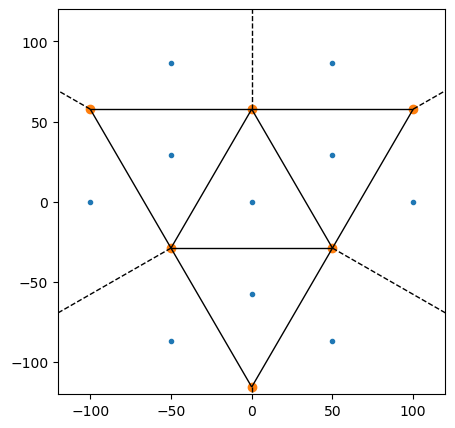

In [6]:
vr = Voronoi(baseline_string_positions)
f, ax = plt.subplots(figsize=(5, 5))
f = voronoi_plot_2d(vr, ax=ax)
lims = 120
plt.xlim(-lims, lims)
plt.ylim(-lims, lims)